In [32]:
import pandas as pd

# Download the dataset from the given link and load it
df = pd.read_csv("/content/Creditcard_data.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    f

<ipython-input-33-1a97993f9dfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


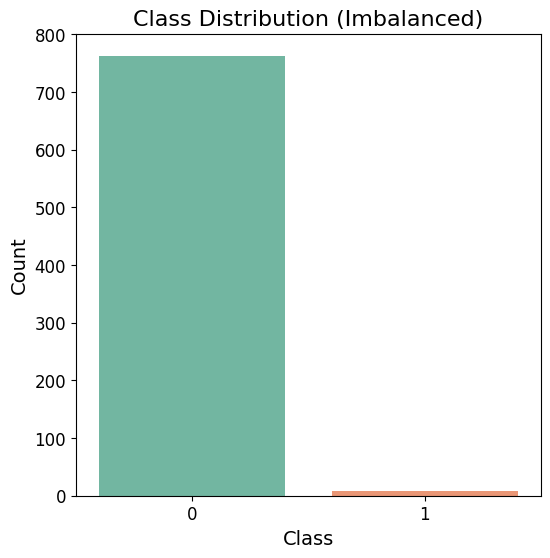


Class Distribution:
Class
0    763
1      9
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the original class distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution (Imbalanced)', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Check the original class distribution
print()
print("Class Distribution:")
print(df['Class'].value_counts())

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Combine the balanced features and target back into a DataFrame
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['Class'] = y_balanced

# Display first few rows of the balanced dataset
print(balanced_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<ipython-input-35-a68652bcae7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette='Set2')  # y_balanced is the target after SMOTE


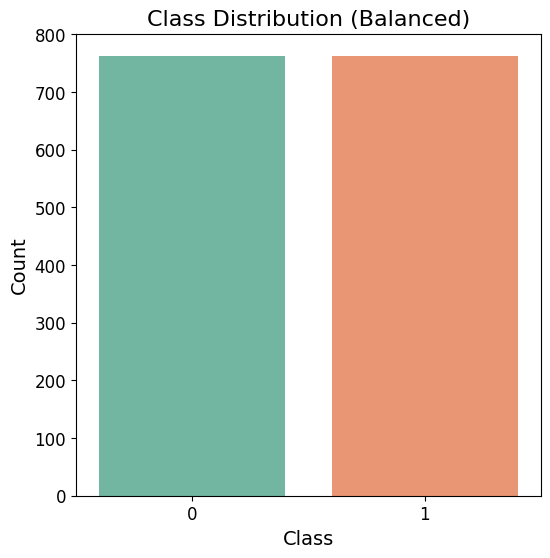


Balanced Class Distribution:
Class
0    763
1    763
Name: count, dtype: int64


In [35]:
# Plot the balanced class distribution
plt.figure(figsize=(6, 6))
sns.countplot(x=y_balanced, palette='Set2')  # y_balanced is the target after SMOTE
plt.title('Class Distribution (Balanced)', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Check the new class distribution
print()
print("Balanced Class Distribution:")
print(pd.Series(y_balanced).value_counts())

In [36]:
import math

# Parameters for the sample size calculation
Z = 1.96  # Z-score for 95% confidence level
p = 0.5   # Estimated proportion (default 0.5 for maximum variability)
E = 0.05  # Margin of error (e.g., 0.05 for 5%)

# Sample size formula
sample_size = math.ceil((Z**2 * p * (1 - p)) / (E**2))

print(f"Z-Score: {Z}")
print(f"Estimated Proportion (p): {p}")
print(f"Margin of Error (E): {E}")
print(f"Calculated Sample Size: {sample_size}")


Z-Score: 1.96
Estimated Proportion (p): 0.5
Margin of Error (E): 0.05
Calculated Sample Size: 385


In [37]:
from sklearn.model_selection import train_test_split

# Simple Random Sampling
simple_random_sample = balanced_df.sample(n=sample_size, random_state=42)

# Systematic Sampling
k = len(balanced_df) // sample_size  # Step size
systematic_sample = balanced_df.iloc[::k]

# Stratified Sampling
_, stratified_sample = train_test_split(
    balanced_df, test_size=sample_size / len(balanced_df), stratify=balanced_df['Class'], random_state=42)

# Cluster Sampling: Group rows into clusters and pick random clusters
balanced_df['Cluster'] = balanced_df.index // (len(balanced_df) // 10)  # Divide into 10 clusters
selected_clusters = balanced_df['Cluster'].sample(n=5, random_state=42).unique()  # Select 5 random clusters
cluster_sample = balanced_df[balanced_df['Cluster'].isin(selected_clusters)].drop(columns=['Cluster'])

# Bootstrap Sampling
bootstrap_sample = balanced_df.sample(n=sample_size, replace=True, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=2000, C=1.0, solver='liblinear'),
    "SVM": SVC(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to evaluate models on a given sample
def evaluate_models(sample, models):
    X_sample = sample.drop('Class', axis=1)
    y_sample = sample['Class']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    results = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Calculate accuracy
        results[model_name] = accuracy_score(y_test, y_pred)
    return results

# Evaluate each sampling technique
sampling_techniques = {
    "SimpleRandom": simple_random_sample,
    "Systematic": systematic_sample,
    "Stratified": stratified_sample,
    "Cluster": cluster_sample,
    "Bootstrap": bootstrap_sample
}

# Store results
final_results = {}
for sampling_name, sample in sampling_techniques.items():
    #print(f"Evaluating models on {sampling_name} sampling...")
    final_results[sampling_name] = evaluate_models(sample, models)

# Display results
final_results_df = pd.DataFrame(final_results)
print("\nModel Accuracies Across Sampling Techniques:")
print()
print(final_results_df)

# Save results to a CSV file
csv_file_path = "model_accuracies.csv"
final_results_df.to_csv(csv_file_path, index=True)
print(f"\nResults saved to '{csv_file_path}'.")


Model Accuracies Across Sampling Techniques:

                    SimpleRandom  Systematic  Stratified   Cluster  Bootstrap
RandomForest            0.974026    1.000000    0.974026  0.973684   0.987013
LogisticRegression      0.896104    0.882353    0.896104  0.907895   0.974026
SVM                     0.649351    0.735294    0.727273  0.802632   0.662338
DecisionTree            0.948052    0.990196    0.896104  0.934211   0.974026
KNN                     0.792208    0.823529    0.714286  0.881579   0.857143

Results saved to 'model_accuracies.csv'.


In [40]:
!git config --global user.name "garimaahuja112"
!git config --global user.email "garimaahuja217@gmail.com"

In [41]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [42]:
!git clone https://github.com/garimaahuja112/Sampling-Garima-102203385

Cloning into 'Sampling-Garima-102203385'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [45]:
!cp /content/102203385.ipynb /content/Sampling-Garima-102203385/


cp: cannot stat '/content/102203385.ipynb': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')